In [49]:
from functions import *
from random import sample
from htmldate import find_date
from concurrent.futures import ThreadPoolExecutor
from bs4 import BeautifulSoup
import json
import os
from langid.langid import LanguageIdentifier, model
import spacy


base_path = "/media/ruben/Data Drive/react-data/npg"

# Open translation file
#refdf = pd.read_csv("/media/ruben/FEF44259F44213F5/Users/Ruben/Documents/GitHub/ReACT_GCV/data/images_tables_article_2/descriptive-full.csv")
#refdf = dict(zip(refdf['image'],refdf['pretty_title']))

In [50]:
# Import Date Dict

datesref = dict()

for photo in [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]:
    photo_folder = os.path.join(base_path, photo)
    
    with open(os.path.join(photo_folder,'dates.txt'),'r') as f:
        dates = f.readlines()
        dates = [d.replace('\n','') for d in dates]
        dates = [d.split('|') for d in dates if d.split('|')[1] != 'na']
        datesref.update({d[0]:d[1][0:4] for d in dates}) 
    

In [51]:
d_ = []


for photo in [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]:
    
    photo_folder = os.path.join(base_path, photo)
    num_iterations = len([fol for fol in os.listdir(photo_folder) if os.path.isdir(os.path.join(photo_folder,fol)) and "source" not in fol])
    start_iter = 1
    range_iter = [str(i) for i in list(range(1,num_iterations+1))]
    folder_base = os.path.join(base_path,photo,photo)
    
    
    for it in range_iter:
        html_folder = folder_base+"_"+it+"/html"
        
        if os.path.isfile(folder_base+"_"+it+"/html/results.txt") is False:
            continue
        
        with open(folder_base+"_"+it+"/html/results.txt",'r') as f:
            tmp = f.readlines()
            
            tmpn = dict()
            
            for d in tmp:
                d = d.replace('\n','').split('|')
                
                try:
                    tmpn.update({d[0]:d[1]})
                except Exception as e:
                    print(e)
                    continue

        for id_,url in tmpn.items():
            
            if url in datesref.keys() and "ERR" not in datesref[url]:
                date = datesref[url]
                iteration = it
                photo = photo
                d_.append([photo,iteration,date,1])
                

list index out of range
list index out of range


In [52]:
d = pd.DataFrame(d_,columns=['photo','iteration','year','n'])[['iteration','year','n']]
d = d.groupby(['iteration','year']).sum().reset_index().pivot(index='year',columns='iteration',values='n').fillna(0).reset_index()

In [53]:
# for col in list(d.columns)[1:]:
#     d[col] = [x / d[col].sum() for x in d[col]]

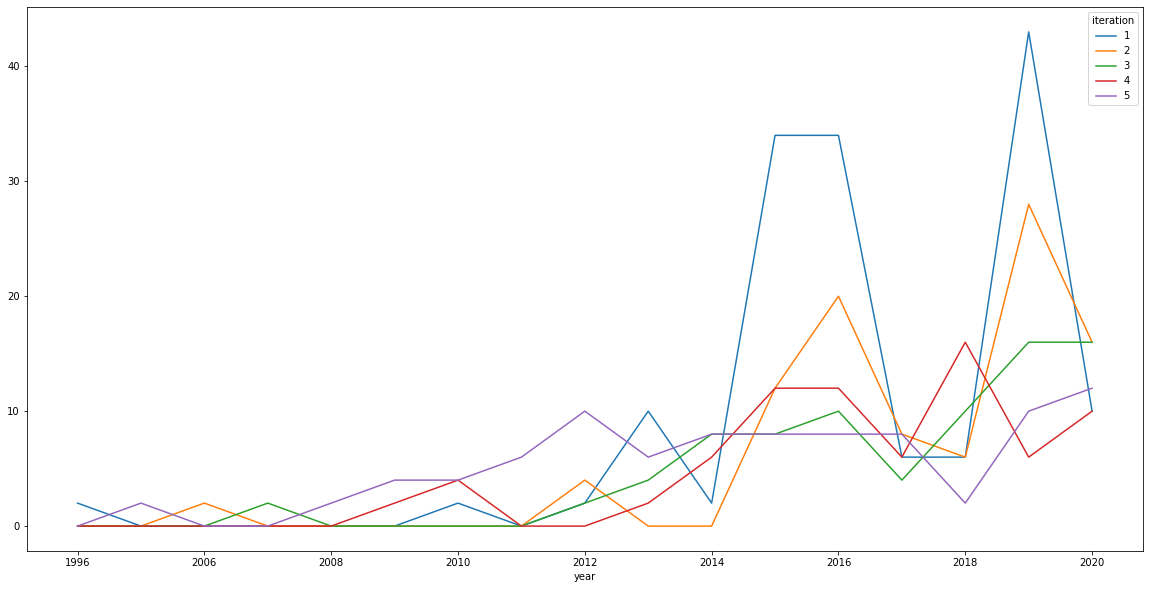

In [54]:
p = d.plot(x='year',y=list(d.columns)[1:],figsize=(20,10))

In [20]:
p